Saving WineQT.csv to WineQT (1).csv
Dataset shape: (1143, 13)
Missing values in each column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64
Dataset description:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000

<ipython-input-2-3c001e438f1d>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='viridis')


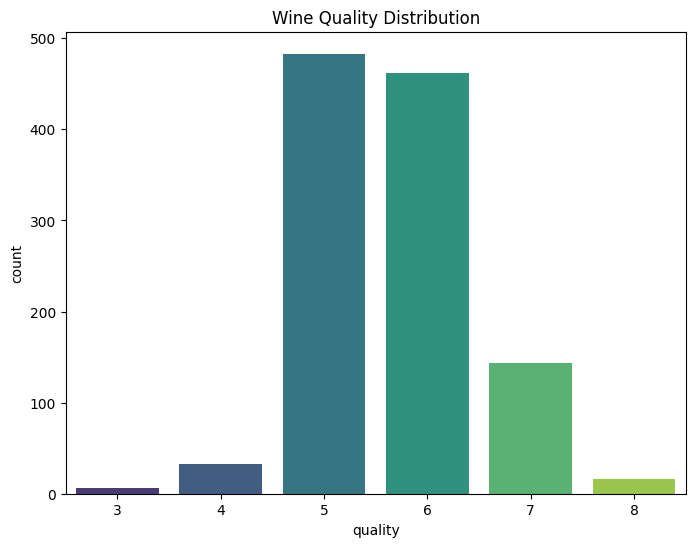

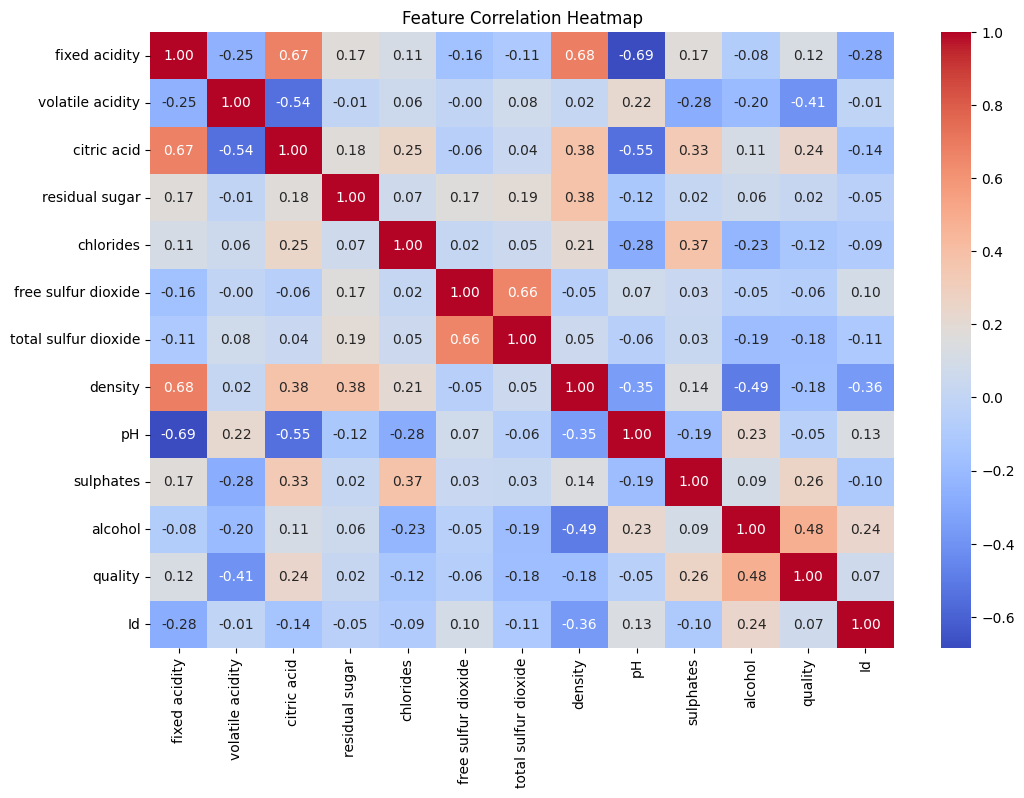

Results for Random Forest:
Accuracy: 0.6987
Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.71      0.80      0.75        96
           6       0.68      0.66      0.67        99
           7       0.72      0.69      0.71        26
           8       0.00      0.00      0.00         2

    accuracy                           0.70       229
   macro avg       0.42      0.43      0.43       229
weighted avg       0.67      0.70      0.68       229

Confusion Matrix:
[[ 0  3  3  0  0]
 [ 0 77 18  1  0]
 [ 0 28 65  6  0]
 [ 0  0  8 18  0]
 [ 0  0  2  0  0]]

Results for SGD Classifier:
Accuracy: 0.5022
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         6
           5       0.57      0.80      0.67        96
           6       0.53      0.24      0.33      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

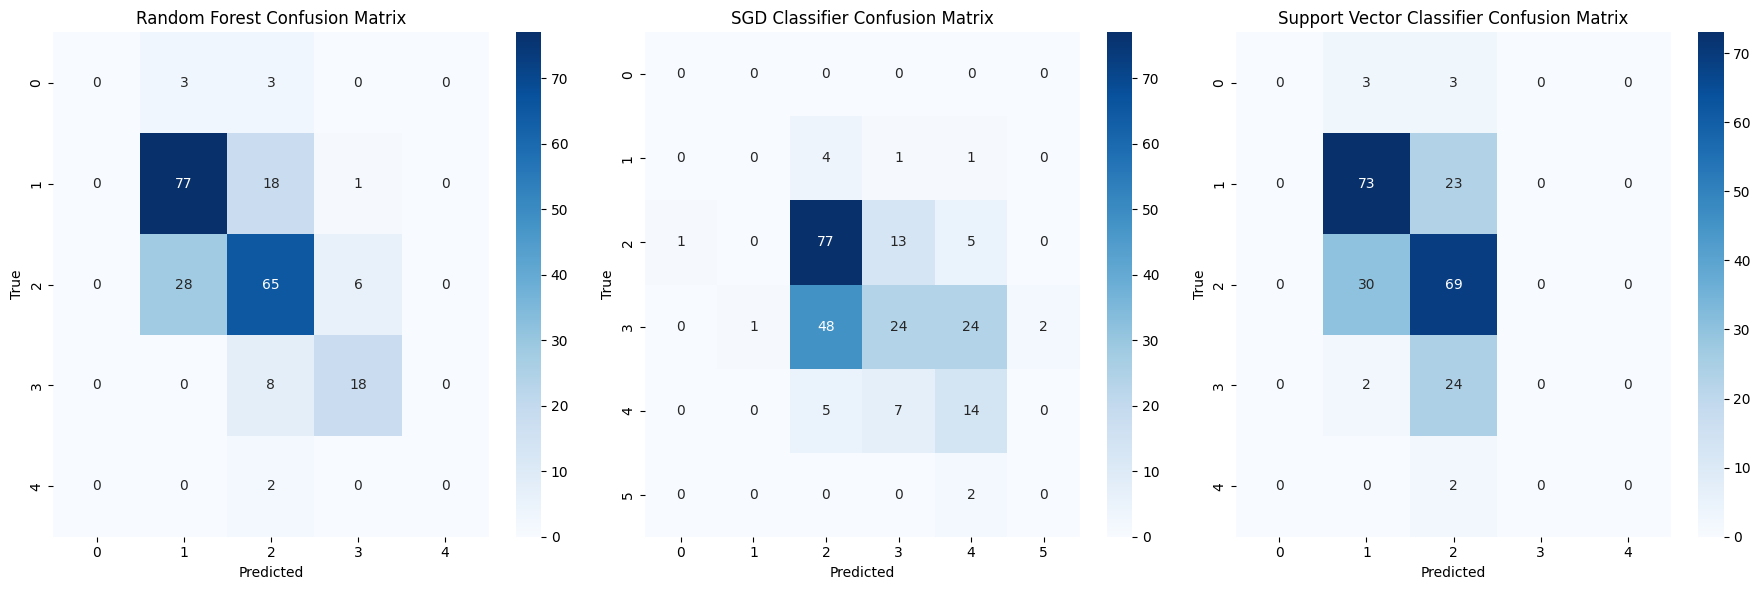

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('WineQT.csv')

df.head()

print(f"Dataset shape: {df.shape}")
print(f"Missing values in each column:\n{df.isnull().sum()}")
print(f"Dataset description:\n{df.describe()}")

plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=df, palette='viridis')
plt.title('Wine Quality Distribution')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

X = df.drop(columns=['quality', 'Id'])
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

sgd_model = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_model.fit(X_train_scaled, y_train)
sgd_pred = sgd_model.predict(X_test_scaled)

svc_model = SVC(kernel='linear', random_state=42)
svc_model.fit(X_train_scaled, y_train)
svc_pred = svc_model.predict(X_test_scaled)

models = ['Random Forest', 'SGD Classifier', 'Support Vector Classifier']
predictions = [rf_pred, sgd_pred, svc_pred]
for model, pred in zip(models, predictions):
    print(f"Results for {model}:")
    print(f"Accuracy: {accuracy_score(y_test, pred):.4f}")
    print(f"Classification Report:\n{classification_report(y_test, pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, pred)}\n")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for ax, model, pred in zip(axes, models, predictions):
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'{model} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout()
plt.show()